In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_csv("./Data/dataforheatmp/Globalmethods_top5features_fortestset.csv",sep='\t')

newdffd = data[["SHAP","ELi5PI" ,"SkaterFImp", "IngrFImp","GlobalSurr" , "IngrFE", "IMLTSurr" , "Intrees" , "FairML"]]
new_data= pd.DataFrame(newdffd)

new_data.rename(columns={'SHAP':'SHAP',
                         'ELi5PI' :'Eli5(Permutation_imp)',
                          'SkaterFImp':'Skater(Feature_imp)',
                            'IngrFImp':'Ingredients(Feature_imp)',
                         'IngrFE':'Ingredients(feature_effects)',
                          'GlobalSurr':'Global Surrogate',
                         'IMLTSurr': 'Iml(Tree surrogate)',
                         'Intrees':'Intrees',
                         'FairML':'FairML'}, inplace=True)

cols = new_data.columns
print(new_data)
newdf1 = pd.DataFrame(columns = cols)
newdf1['ind'] = cols
newdf7 = newdf1.set_index('ind')

for i in range(0,len(new_data.columns)):
    inner = new_data.columns[i+1:]
    if len(inner) != 0:
        for j in range(i+1,len(new_data.columns)):        
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = (intersect*100)/5
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc

            
        for k in range(len(new_data.columns[:-1])):
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = int((intersect*100)/5)
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc
               

newdf7 = newdf7.fillna(1)
newdf7.astype('int64')
print(newdf7)



  SHAP ELi5PI SkaterFImp IngrFImp GlobalSurr IngrFE IMLTSurr Intrees  FairML
0  V14    V12        V14      V14        V17    V14      V17     V17     V11
1  V12    V14        V12      V12        V14    V12      V12     V10      V4
2   V4     V3         V4      V17         V7    V17       V9     V14     V13
3  V10    V10         V3       V4        V12    V16      V26     V27  Amount
4   V3     V4        V10      V10         V3    V11      V14      V7     V21
             SHAP  ELi5PI  SkaterFImp  IngrFImp  GlobalSurr  IngrFE  IMLTSurr  \
ind                                                                             
SHAP          1.0   100.0       100.0      80.0        60.0    40.0      40.0   
ELi5PI      100.0     1.0       100.0      80.0        60.0    40.0      40.0   
SkaterFImp  100.0   100.0         1.0      80.0        60.0    40.0      40.0   
IngrFImp     80.0    80.0        80.0       1.0        60.0    60.0      60.0   
GlobalSurr   60.0    60.0        60.0      60.0     

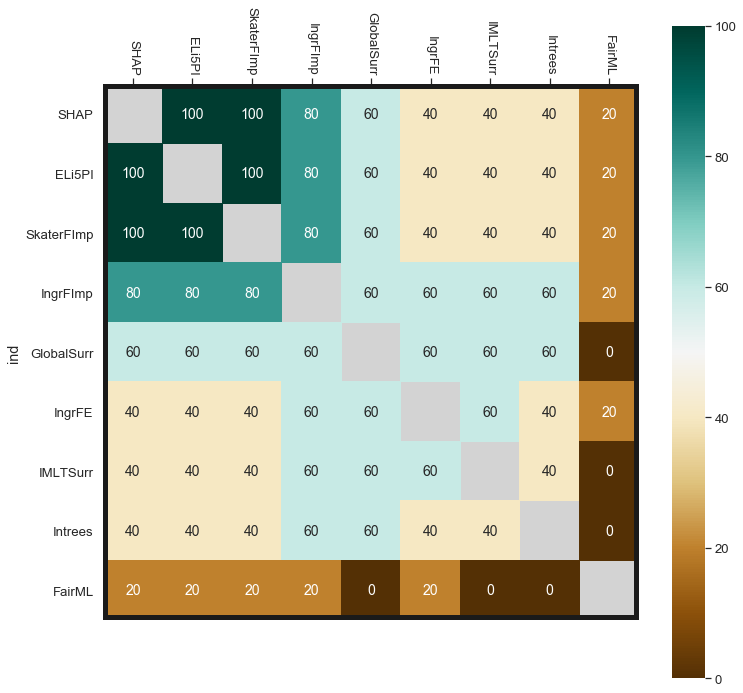

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
ax.set_facecolor("lightgrey")
sn.heatmap(newdf7,annot=True, square=True, ax=ax,robust=True, cmap ="BrBG", annot_kws={"fontsize":14},fmt='g',mask=newdf7== 1)
ax.xaxis.set_ticks_position('top')
plt.setp(ax.get_yticklabels(), rotation=360)

ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=newdf7.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=newdf7.shape[0], color='k',linewidth=10)
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.xticks(rotation=270)
plt.savefig('Heatmap_Globalmethods_for_testset.png')
plt.show()

